In [ ]:
# instalo la librería que me falta:
%pip install seaborn
%pip install sqlalchemy


CONEXION CON MYSQL - CARGA DE TABLAS - CREACIÓN DATAFRAMES:
Definiré 3 funciones: conexión, diccionario tablas, diccionario datraframes. Utilizaré main al final para ejecutar las funciones y mostrar mensajes.

In [270]:
# Importo las librerías que necesitaré para el sprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector

# Función para conectarme a la base de datos y verificar la conexión
def conexion():
    conexion = mysql.connector.connect(user='root', password='SQLespe2010', host='localhost', database='sprint4', port='3306')
    
    # Verificación de la conexión
    if conexion.is_connected():
        print(f"Conectado a la BBDD '{conexion.database}'")
    else:
        print("Error al conectar a la base de datos")
    
    return conexion

# Función para obtener las tablas de la base de datos
def obtener_tablas(conexion):
    cursor = conexion.cursor()
    cursor.execute("SHOW TABLES;")
    tablas = cursor.fetchall()
    diccionario_tablas = {tabla[0]: f"SELECT * FROM {tabla[0]}" for tabla in tablas}
    return diccionario_tablas

# Función para crear los dataframes para cada tabla de manera dinámica
def dicc_dataframes(conexion):
    dicc_tablas = obtener_tablas(conexion)
    dataframes = {}
    for tabla, query in dicc_tablas.items():
        df = pd.read_sql(query, conexion)
        dataframes[tabla] = df
        print(f"Dataframe creado para la tabla '{tabla}' con {len(df)} filas")
    # Uso 'global' para dar nombre de variable a cada df (variable=tabla_df)
    for tabla, df in dataframes.items():
        globals()[f"{tabla}_df"] = df  # Asigna el DataFrame a una variable global con el nombre de la tabla
    return dataframes

# con main ejecuto las funciones y cierro la conexión
def main():
    conexion_db = conexion()
    dicc_dataframes(conexion_db)  
    conexion_db.close()
    print("Conexión a la BBDD cerrada")


main()

Conectado a la BBDD 'sprint4'
Dataframe creado para la tabla 'cc_active' con 275 filas
Dataframe creado para la tabla 'companies' con 100 filas
Dataframe creado para la tabla 'credit_cards' con 275 filas
Dataframe creado para la tabla 'product' con 100 filas
Dataframe creado para la tabla 'producttransaction' con 1457 filas
Dataframe creado para la tabla 'transactions' con 587 filas
Dataframe creado para la tabla 'users' con 275 filas
Conexión a la BBDD cerrada


C:\Users\Espe\AppData\Local\Temp\ipykernel_4140\3371102352.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion)


Exploro los datos de la tabla 'cc_active' para revisar si hay que transformar datos. Los datos son correctos.

In [229]:
print(cc_active_df.info())
cc_active_df.dtypes
print(cc_active_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit_card_id  275 non-null    object
 1   EstadoTarjeta   275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB
None
  credit_card_id EstadoTarjeta
0       CcU-2938        Activa
1       CcU-2945        Activa
2       CcU-2952        Activa


Exploro los datos de la tabla Companies para revisar si hay que transformar datos. Los datos son correctos.

In [230]:
print(companies_df.info())
companies_df.dtypes
print(companies_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None
  company_id               company_name           phone  \
0     b-2222  Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226   Magna A Neque Industries  04 14 44 64 62   
2     b-2230                Fusce Corp.  08 14 97 58 85   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   

                            website  
0      https://instagram

Exploro los datos de la tabla 'credit_cards' para revisar si hay que transformar datos. Los datos son correctos.

In [231]:
print(credit_cards_df.info())
credit_cards_df.dtypes
print(credit_cards_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    int64 
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    int64 
 5   cvv            275 non-null    int64 
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: int64(3), object(6)
memory usage: 19.5+ KB
None
         id  user_id                          iban               pan   pin  \
0  CcU-2938      275    TR301950312213576817638661  5424465566813633  3257   
1  CcU-2945      274  DO26854763748537475216568689  5142423821948828  9080   
2  CcU-2952      273        BG45IVQL52710525608255  4556 453 55 5287  4598   

   cvv                                         track1 

Exploro los datos de la tabla 'product' para revisar si hay que transformar datos. Los datos son correctos.

In [232]:
print(product_df.info())
product_df.dtypes
print(product_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    float64
 3   colour        100 non-null    object 
 4   weight        100 non-null    int64  
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None
   id            product_name   price   colour  weight warehouse_id
0   1        Direwolf Stannis  161.11  #7c7c7c       1         WH-4
1   2             Tarly Stark    9.24  #919191       2         WH-3
2   3  duel tourney Lannister  171.13  #d8d8d8       2         WH-2


Exploro los datos de la tabla 'producttransaction' para revisar si hay que transformar datos. Los datos son correctos.

In [233]:
print(producttransaction_df.info())
producttransaction_df.dtypes
print(producttransaction_df.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB
None
                         transaction_id  product_id
0  02C6201E-D90A-1859-B4EE-88D2986D3B02           1
1  122DC333-E19F-D629-DCD8-9C54CF1EBB9A           1
2  1753A288-9FC1-52E6-5C39-A1FFB97B0D3A           1


Exploro los datos de la tabla 'transactions' para revisar si hay que transformar datos. Hago una exploración más profunda con describe y shape ya que es la tabla de hechos y me interesa para revisar las variables para g¡cada ejercicio. Los datos no son correctos. Tengo que transformar lat y long a float en caso de querer utilizarlos más adelante.

In [271]:
print(transactions_df.info())
print(transactions_df.head(3))
print(transactions_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    object        
 9   longitude    587 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 46.0+ KB
None
                                     id   card_id business_id  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1  0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2  063FBA79-99EC-66FB-29F

In [272]:
print(transactions_df.describe())

                           timestamp      amount    declined     user_id
count                            587  587.000000  587.000000  587.000000
mean   2021-09-06 14:56:16.795570688  256.735520    0.148211  201.359455
min              2021-03-17 02:55:49   15.050000    0.000000   60.000000
25%       2021-06-02 05:14:58.500000  131.115000    0.000000  126.000000
50%              2021-08-27 10:25:34  257.440000    0.000000  220.000000
75%              2021-12-13 08:24:48  389.900000    0.000000  268.000000
max              2022-03-16 14:01:36  499.230000    1.000000  275.000000
std                              NaN  144.133895    0.355612   71.104417


Transformo lat y long a float y vuelvo a mostrar detalle del df

In [273]:
transactions_df['lat'] = transactions_df['lat'].str.strip('\r').astype(float)
transactions_df['longitude'] = transactions_df['longitude'].str.strip('\r').astype(float)


In [274]:
print(transactions_df.info())
print(transactions_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 46.0+ KB
None
                                     id   card_id business_id  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1  0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2  063FBA79-99EC-66FB-29F

Exploro los datos de la tabla 'users' para revisar si hay que transformar datos. El campo 'birth_date' está como object y lo cambiaré a datetime para poder calcular edades y categorizarlas en grupos de edad más adelante.

In [275]:
print(users_df.info())
users_df.shape
print(users_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    int64 
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB
None
   id     name    surname           phone                              email  \
0   1     Zeus     Gamble  1-282-581-0551       interdum.enim@protonmail.edu   
1   2  Garrett  Mcconnell  (718) 257-2412  integer.vitae.nibh@protonmail.org   
2   3   Ciaran   Harrison  (522) 598-1365           interdum.feugiat@aol.org   
3   4   Howard   Stafford  

In [282]:
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'], format='%b %d, %Y')
print(users_df.info())
print(users_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    int64         
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 21.6+ KB
None
   id     name    surname           phone                              email  \
0   1     Zeus     Gamble  1-282-581-0551       interdum.enim@protonmail.edu   
1   2  Garrett  Mcconnell  (718) 257-2412  integer.vitae.nibh@protonmail

# EJERCICIO 1: UNA VARIABLE NUMÉRICA

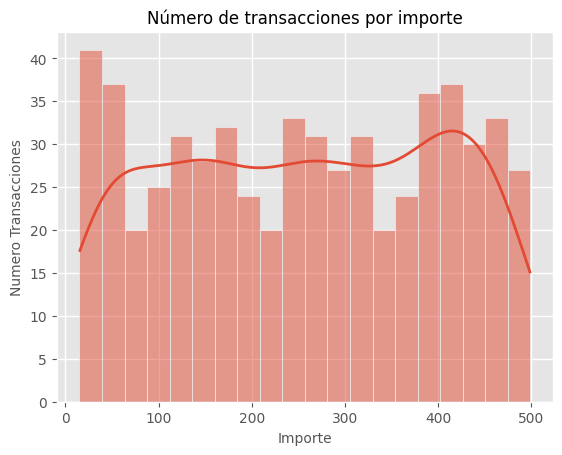

In [276]:
plt.style.use('ggplot')
sns.histplot(transactions_df['amount'], bins=20, kde=True)
plt.title('Número de transacciones por importe', fontsize=12)
plt.xlabel('Importe', fontsize=10)
plt.ylabel('Numero Transacciones', fontsize=10)
plt.show()

El importe es una variable cuantitativa contínua (valor dentro de un rango). un boxplot tmbién hubiese sido también una una opción, para ver los outliers más claramente, pero el histograma también es bueno para reflejarlos. En la x represento los importes y en el eje y en número de transacciones por cada barra. como le indico 20 bins(columnas) cada columna representa 25 transacciones.
Voy a revisar las medidas estadísticas básicas de esta variable:
Analizando el resultado de las variables estadísticas, la desviación estándar (144.133) nos indica que los importes de las transacciones varían bastante con un máx(499.23) y un min(15,05). Aunque la media nos indica que en general el gasto ronda los 256 euros, hay compras tanto muy pequeñas como muy grandes. La media(256,735) y la mediana (257.440), están muy cerca, lo que nos indica que la mayoría de los importes están en torno a los 257€.

EJERCICIO 2: 2 VARIABLES NUMÉRICAS
Me interesa analizar si el importe de las transacciones tiene relación con la fecha

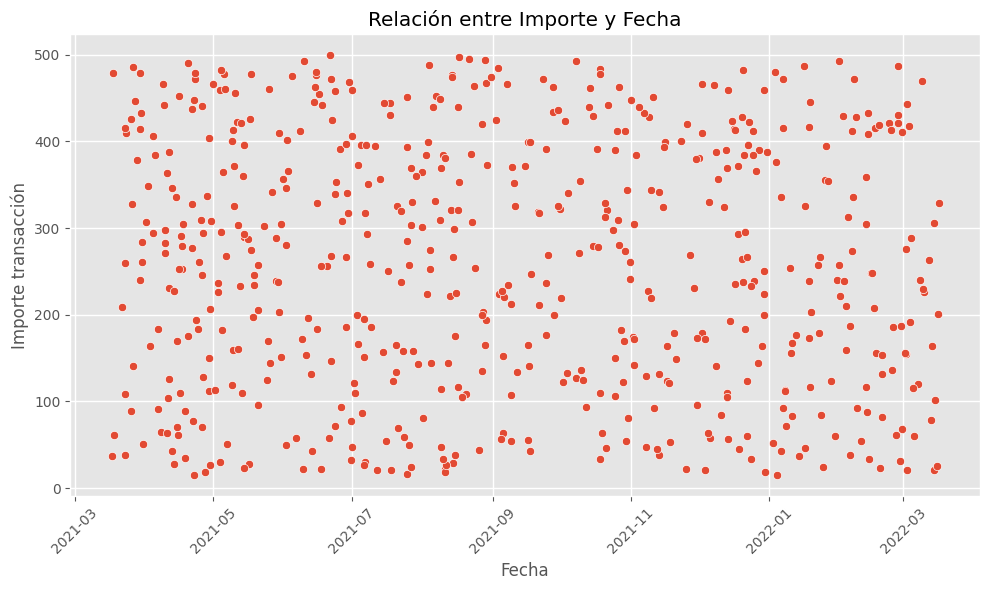

In [277]:
plt.style.use('ggplot')


plt.figure(figsize=(10, 6))
sns.scatterplot(x=transactions_df['timestamp'], y=transactions_df['amount'])


plt.title('Relación entre Importe y Fecha')
plt.xlabel('Fecha')
plt.ylabel('Importe transacción')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

En el eje de las x aparece la línea de tiempo. Respecto al importe, no se ve que los importes más altos o bajos se centren en un momento de tiempo concreto. Hay gran variedad de importes a lo largo del tiempo y mucha dispersión, por lo que no podemos concluir ningún patrón. Recomendaría categorizar las fechas por meses y años para analizar más en profundidad

EJERCICIO 3: UNA VARIABLE CATEGÓRICA
Empresas por país

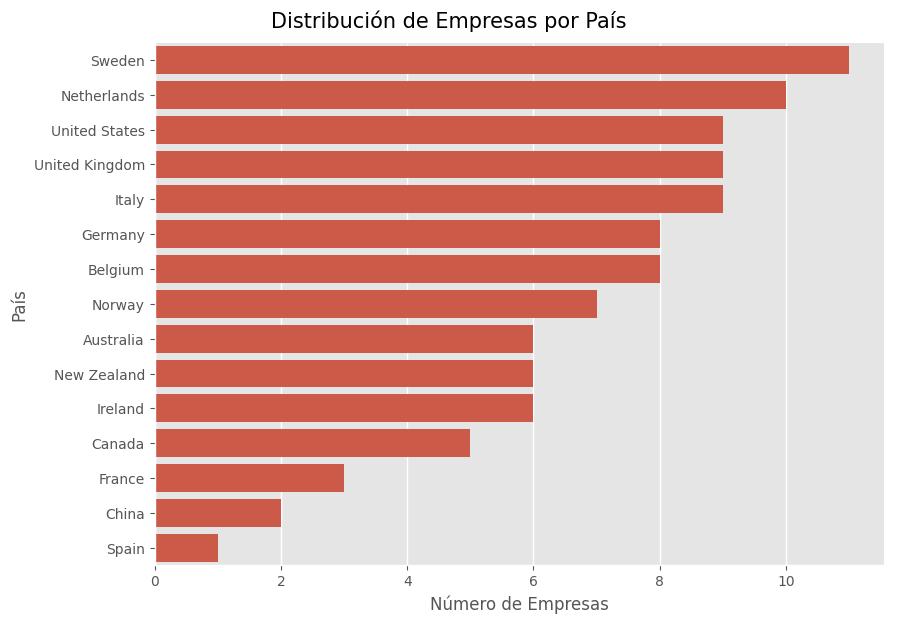

In [278]:

plt.style.use('ggplot')

g3 = sns.catplot(y = 'country', data = companies_df, kind='count', height= 6, aspect=1.5,order=companies_df['country'].value_counts().index)

g3.fig.suptitle('Distribución de Empresas por País', fontsize=15, y=1.03)
g3.set(xlabel='Número de Empresas', ylabel='País')

plt.show()

En el eje de las x mostramos el número de empresas por país y en el eje de las y  los países.
El gráfico escogido es un barplot con el tipo "count", aunque para categóricas hay otros gráficos que podrían funcionar como pie, waffle, lollipop, treemap y más.
Los países En el top de países encontramos a Suecia (11) seguida por Netherlands  (10) y destacan, con menos empresas, España(1)seguido por china (2) 

EJERCICIO  4: UNA VARIABLE CATEGORICA Y UNA NUMÉRICA
voy a analizar el importe por fecha, pero dado que en el ejercicio 2 veíamos mucha dispersión y ningín patrón aparente, aprovecho este ejercicio para profundizar categorizando las fechas por mes/año en nueva columna.

Como no consigo que me pordene los meses de 2021 y 2022 conológig¡camente creo una variable para pedir que ordene y la uso en el parámetro order en la creación del gráfico y en lugar de interactuar directamente en la columna timestamp para conscambiarla a objeto period y tener complicaciones con el uso de métodos de datetime o priod, creo columnas independientes para los periodos. Añado Columna 'Año' de timestamp directamente para usar en el hue. Otra columna para los periodos de mes que usaré en el eje x

In [279]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    int64         
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 46.0+ KB


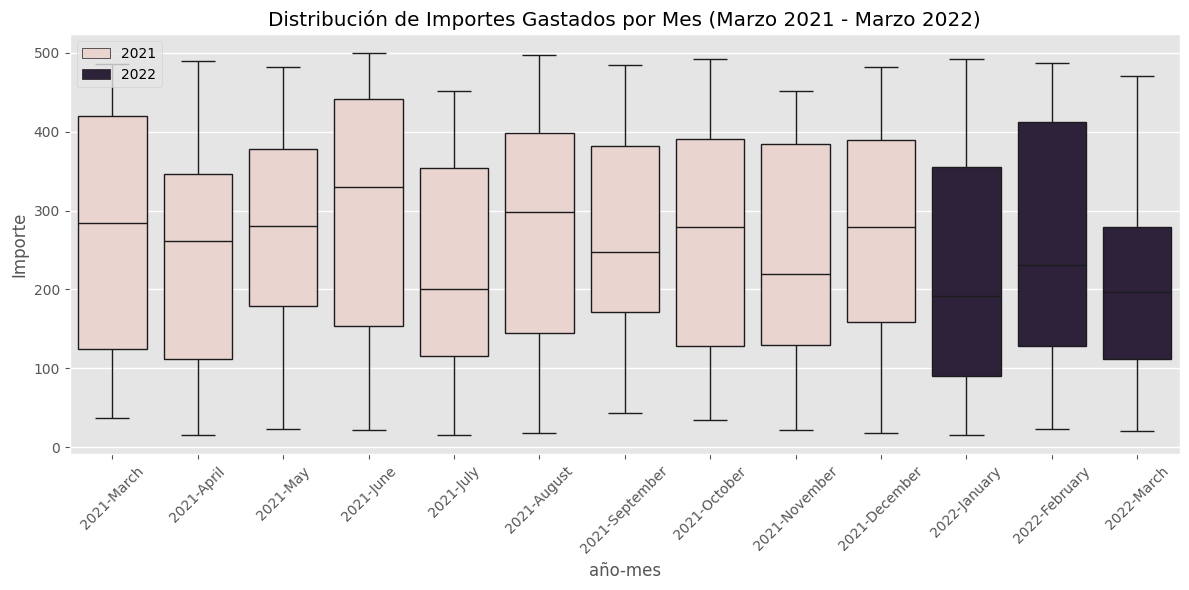

In [ ]:
# Crear primero la columna 'año-mes'
transactions_df['año-mes'] = transactions_df['timestamp'].dt.strftime('%Y-%B')

# Ahora se puede reordenar usando la columna 'año-mes'
reordenar = transactions_df.sort_values('timestamp')['año-mes'].unique()

# Crear otras columnas
transactions_df['año'] = transactions_df['timestamp'].dt.year
transactions_df['periodo_mensual'] = transactions_df['timestamp'].dt.to_period('M')

# Graficar
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

sns.boxplot(x='año-mes', y='amount', hue='año', data=transactions_df, order=reordenar)

plt.title('Distribución de Importes Gastados por Mes (Marzo 2021 - Marzo 2022)')
plt.xlabel('año-mes')
plt.ylabel('Importe')

plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

EJERCICIO 5: DOS VARIABLES CATEGÓRICAS
Voy a centrarme en analizar los usuarios (según su edad) por país y franja de edad, que todavía no habían entrado en ningun gráfico. 
Tenemos la fecha de nacimiento. Calcularé la edad restando fecha actual y fecha nacimiento y crearé nuevas columnas para mostrar la edad y el grupo al que pertenece

In [283]:
hoy = pd.Timestamp.today()
users_df['edad'] = ((hoy - users_df['birth_date']).dt.days / 365.25).astype(int)
print(users_df.head())


   id     name    surname           phone                              email  \
0   1     Zeus     Gamble  1-282-581-0551       interdum.enim@protonmail.edu   
1   2  Garrett  Mcconnell  (718) 257-2412  integer.vitae.nibh@protonmail.org   
2   3   Ciaran   Harrison  (522) 598-1365           interdum.feugiat@aol.org   
3   4   Howard   Stafford  1-411-740-3269          ornare.egestas@icloud.edu   
4   5    Hayfa     Pierce  1-554-541-2077     et.malesuada.fames@hotmail.org   

  birth_date        country        city postal_code                 address  \
0 1985-11-17  United States      Lowell       73544   348-7818 Sagittis St.   
1 1992-08-23  United States  Des Moines       59464             903 Sit Ave   
2 1998-04-29  United States    Columbus       56518     736-2063 Tellus St.   
3 1989-02-18  United States      Kailua       77417  Ap #545-2244 Erat. Rd.   
4 1998-09-26  United States       Sandy       31564   341-2821 Ultrices Av.   

   edad  
0    39  
1    32  
2    26  
3   

Creo otra columna de 'grupo_edad' donde para clasificar a cada usuario

In [284]:
bins_edad = [0, 25, 35, 45, 75]
etiqueta_edad = ['Junior', 'Joven', 'Medio', 'Senior'] 
orden_categorias = ['Junior', 'Joven', 'Medio', 'Senior']

users_df['grupo_edad'] = pd.cut(users_df['edad'], bins=bins_edad, labels=etiqueta_edad, right=False)

print(users_df[['id', 'name', 'edad', 'grupo_edad']].head(10))

   id     name  edad grupo_edad
0   1     Zeus    39      Medio
1   2  Garrett    32      Joven
2   3   Ciaran    26      Joven
3   4   Howard    35      Medio
4   5    Hayfa    26      Joven
5   6     Joel    35      Medio
6   7   Rafael    43      Medio
7   8   Nissim    31      Joven
8   9   Mannix    37      Medio
9  10   Robert    40      Medio


In [285]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           275 non-null    int64         
 1   name         275 non-null    object        
 2   surname      275 non-null    object        
 3   phone        275 non-null    object        
 4   email        275 non-null    object        
 5   birth_date   275 non-null    datetime64[ns]
 6   country      275 non-null    object        
 7   city         275 non-null    object        
 8   postal_code  275 non-null    object        
 9   address      275 non-null    object        
 10  edad         275 non-null    int64         
 11  grupo_edad   275 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(2), object(8)
memory usage: 24.2+ KB


Ahora diseñamos el gráfico.mostraremos el procentaje de población por rengo de edad y país. En el eje de las x las categorías de edad y en eje y, el porcentaje. Utilizaremos el país para hue

C:\Users\Espe\AppData\Local\Temp\ipykernel_4140\936734584.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_pais_edad = users_df.groupby(['country', 'grupo_edad']).size().reset_index(name='count')


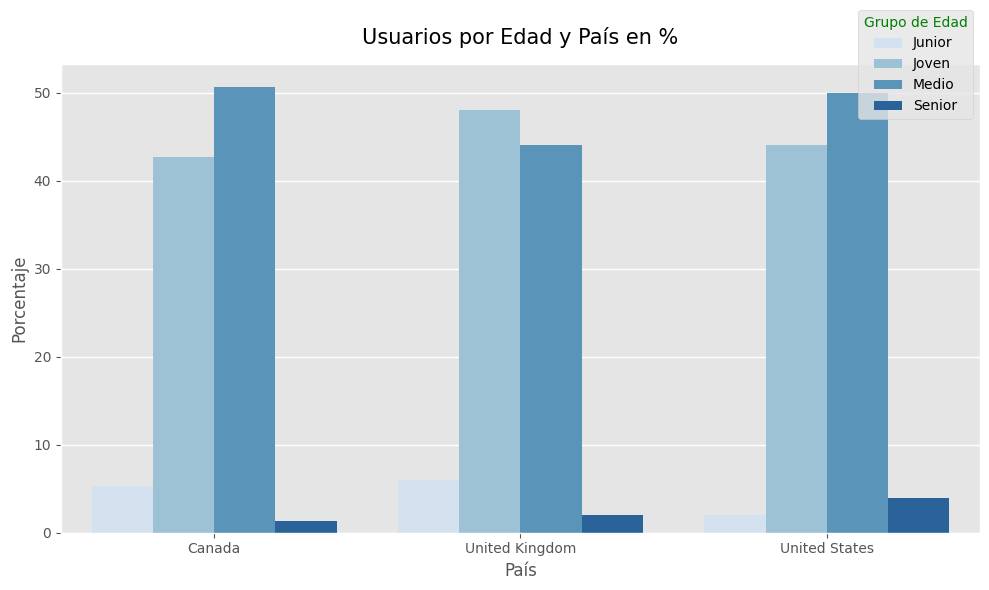

In [286]:
plt.style.use('ggplot')

grupo_pais_edad = users_df.groupby(['country', 'grupo_edad']).size().reset_index(name='count')
total_pais = grupo_pais_edad.groupby('country')['count'].transform('sum')
grupo_pais_edad['percentage'] = (grupo_pais_edad['count'] / total_pais) * 100

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=grupo_pais_edad,x='country', y='percentage', hue='grupo_edad',palette="Blues", 
    order=grupo_pais_edad['country'].unique())

plt.title('Usuarios por Edad y País en %', fontsize=15, pad=15)
plt.xlabel('País', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, title="Grupo de Edad", fontsize=10, bbox_to_anchor=(1.00, 1), loc='center right')
legend.get_title().set_color('green')

plt.tight_layout()

plt.show()

Elección del gráfico:
He elegido un gráfico de barras agrupadas para representar la distribución en porcentaje de los usuarios según su franja de edad y desglosando por país. Este gráfico compara visualmente las categorías de edad en cada país de manera clara.
Utilizo hue para separar las franjas de edad por colores en a cada país. Podría haber utilizado barras apiladas, pero la visualización no es tan clara. He utilizado la distribución de esas franjas de edades procentualmente en lugar de con cifras absolutas para que sea más intuitivo al no conocer la población total del país. Nos muestra la representación en relación con el total.

Datos destacables:
El gráfico nos demuestrs que las categorías de edad se reparten de manera distinta entre los países. Por ejemplo, en algunos países, la mayoría están en la franja "Junior", mientras que en otros hay una mayor proporción de en las categorías "Senior" o "Medio". Curiosamente, en cuanto a los países con mayor o menor población, Estados Unidos (elevada población), presenta más equilibradas las franjas de edad, mientras que otros más pequeños concentran en una sola categoría más usuarios. La composición demográfica de cada país ininfluira en la distribución de edades de los usuarios.

Interpretación:
Vemos que hay bastantes usuarios jóvenes en la mayoría de los países, franja "Junior" (<25 años), lo que nos induce a pensar que merece la pena que las empresas enfoquen acciones específicas para vendes a esa franja de edad. En otros países, la franja "Senior" (> 55 años) tiene una presencia mayor, quw puede indicar que en esos países la población está más envejecida o que los usuarios senior están mejor representados. De todos modos, tendría en cuenta que en cada país, las distribuciones de edad pueden estar influenciadas por distintos factores, como las acciones de máketing dirigidas a esta franja de edades o las tendencias sociales, políticas y económicas de cada país.

EJERCICIO 6: 3 VARIABLES


In [293]:
bins_precio = [0, 50, 120, 196.65]
label_precio = ['Barato', 'Medio', 'Caro'] 

product_df['nivel_precio'] = pd.cut(product_df['price'], bins=bins_precio, labels=label_precio)

product_df[['product_name', 'price', 'nivel_precio']].head()

,product_name,price,nivel_precio
0,Direwolf Stannis,161.11,Caro
1,Tarly Stark,9.24,Barato
2,duel tourney Lannister,171.13,Caro
3,warden south duel,71.89,Medio
4,skywalker ewok,171.22,Caro


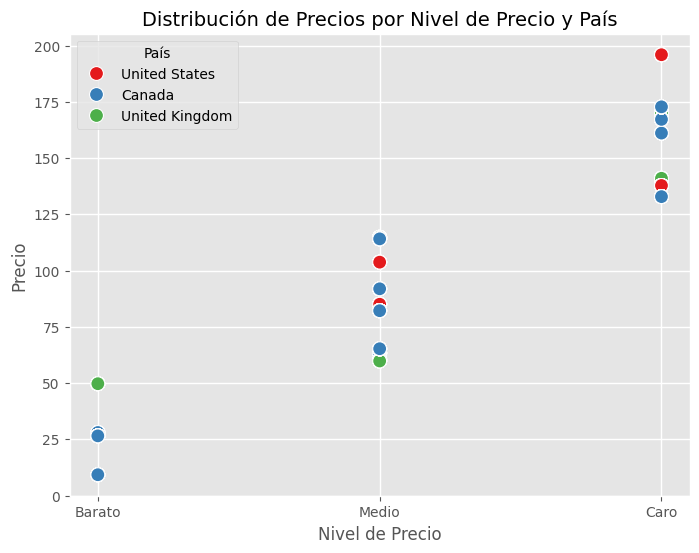

In [307]:
# Paso 1: Hacer merge de producttransaction_df con product_df para obtener detalles de cada producto
merged_products = producttransaction_df.merge(product_df[['id', 'product_name', 'price', 'nivel_precio']], 
                                               left_on='product_id', right_on='id', how='left')

# Paso 2: Hacer merge con transactions_df para obtener el user_id de las transacciones
merged_transactions = merged_products.merge(transactions_df[['id', 'user_id']], 
                                            left_on='transaction_id', right_on='id', how='left')

# Paso 3: Hacer merge con users_df para obtener el país de los usuarios
final_df = merged_transactions.merge(users_df[['id', 'country']], 
                                      left_on='user_id', right_on='id', how='left')

# Crear gráfico de dispersión con tres variables: nivel_precio, precio, y país
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df['nivel_precio'], y=final_df['price'], hue=final_df['country'], palette='Set1', s=100)

# Personalización del gráfico
plt.title('Distribución de Precios por Nivel de Precio y País', fontsize=14)
plt.xlabel('Nivel de Precio', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.legend(title='País')
plt.grid(True)

# Mostrar gráfico
plt.show()

OPCIÓN 2: Análisis basado en un sólo dataframe (transactions): los clientes categorizados según su consumo (top-bueno-medio-puntual) basando los bins en el resumen estadístico del campo 'amount'(cuartiles) en una coluna nueva y los agrupo y cuento.

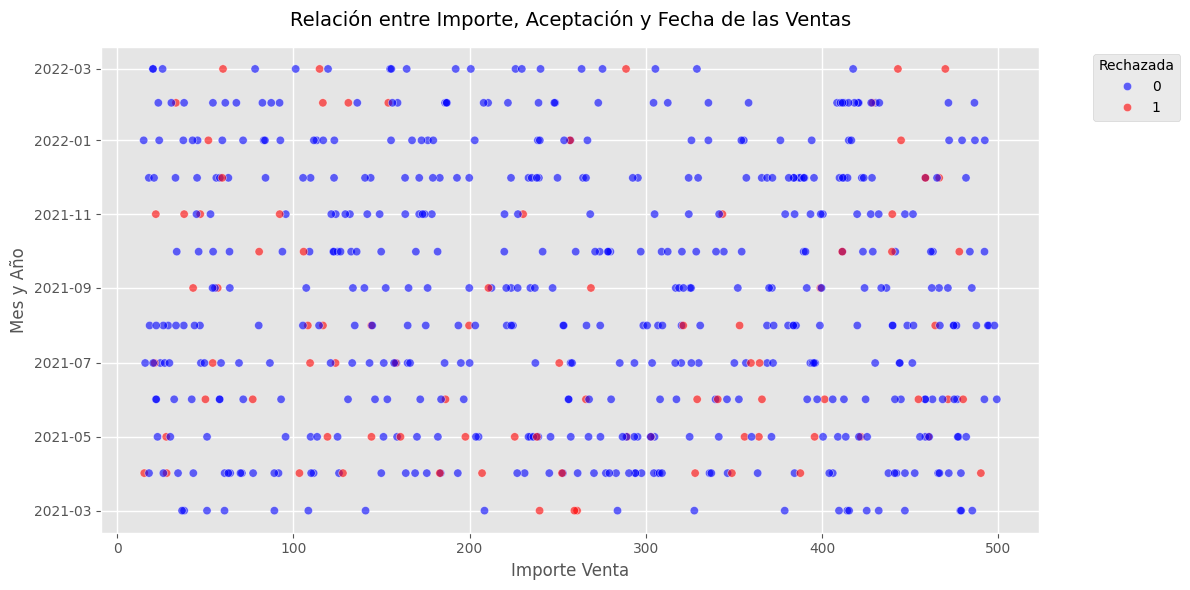

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=transactions_df,
    x='amount',
    y='año-mes',
    hue='declined',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)

# Personalizamos el gráfico
scatter.set_title('Relación entre Importe, Aceptación y Fecha de las Ventas', fontsize=14, pad=15)
scatter.set_xlabel('Importe Venta', fontsize=12)
scatter.set_ylabel('Mes y Año', fontsize=12)
plt.legend(title='Rechazada', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustamos el diseño
plt.tight_layout()
plt.show()

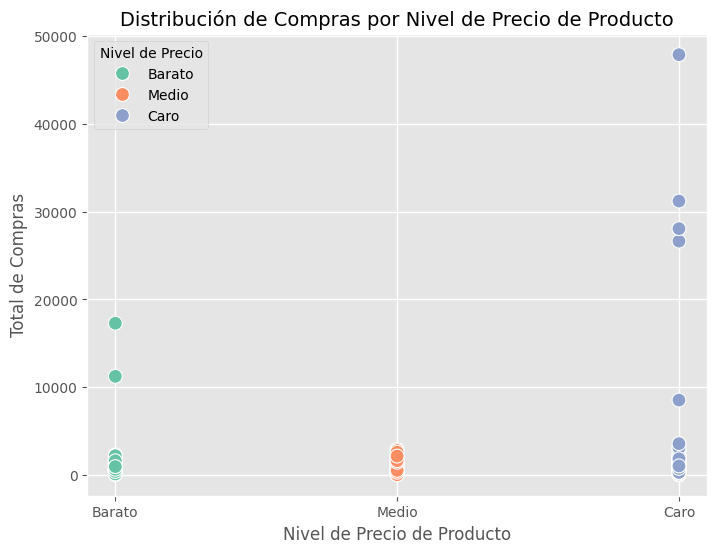

In [313]:
# Paso 1: Calcular el total de compras por usuario (sumar 'amount' de cada transacción)
total_compras_usuario = transactions_df.groupby('user_id')['amount'].sum().reset_index()

# Paso 2: Crear los bins y labels para categorizar a los usuarios
# Usamos los cuartiles para obtener 3 categorías de gasto
bins_compras = total_compras_usuario['amount'].quantile([0, 0.33, 0.66, 1]).values
labels_compras = ['Puntual', 'Bueno', 'Top']

# Asignamos las categorías al dataframe de total_compras_usuario
total_compras_usuario['categoria_usuario'] = pd.cut(total_compras_usuario['amount'], bins=bins_compras, labels=labels_compras, include_lowest=True)

# Paso 3: Hacer merge con users_df para obtener los datos del usuario (id, name, country)
final_df = total_compras_usuario.merge(users_df[['id', 'name', 'country']], left_on='user_id', right_on='id', how='left')

# Paso 4: Hacer merge con producttransaction_df para asociar los product_id con el transaction_id
# Primero, necesitamos recuperar el `transaction_id` asociado a cada producto para el usuario
user_transactions = transactions_df[['id', 'user_id', 'amount']]  # Añadir la columna amount

# Merge de las transacciones con la tabla intermedia para obtener product_ids
user_transactions_products = user_transactions.merge(producttransaction_df[['transaction_id', 'product_id']], left_on='id', right_on='transaction_id', how='left')

# Paso 5: Hacer merge con el dataframe de productos para añadir la columna 'nivel_precio'
user_transactions_products = user_transactions_products.merge(product_df[['id', 'nivel_precio']], left_on='product_id', right_on='id', how='left')

# Paso 6: Agrupar por usuario para obtener el total de compras y el nivel de precio de los productos comprados
# Aquí sumamos el 'amount' de todas las transacciones de un usuario
final_df = user_transactions_products.groupby('user_id').agg({
    'amount': 'sum',  # Total de compras por usuario
    'nivel_precio': 'first'  # Nivel de precio de uno de los productos comprados por el usuario
}).reset_index()

# Paso 7: Hacer merge con users_df nuevamente para obtener información adicional (como nombre y país)
final_df = final_df.merge(users_df[['id', 'name', 'country']], left_on='user_id', right_on='id', how='left')

# Paso 8: Crear gráfico de dispersión con tres variables: nivel_precio, categoria_usuario, y el total de compras
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df['nivel_precio'], y=final_df['amount'], hue=final_df['nivel_precio'], palette='Set2', s=100)

# Personalización del gráfico
plt.title('Distribución de Compras por Nivel de Precio de Producto', fontsize=14)
plt.xlabel('Nivel de Precio de Producto', fontsize=12)
plt.ylabel('Total de Compras', fontsize=12)
plt.legend(title='Nivel de Precio')
plt.grid(True)

# Mostrar gráfico
plt.show()

EJERCICIO 7: PAIRPLOT
Haré un merge de los dataframes 'transactions' y 'product' usando la tabla intermedia 'producttransaction'

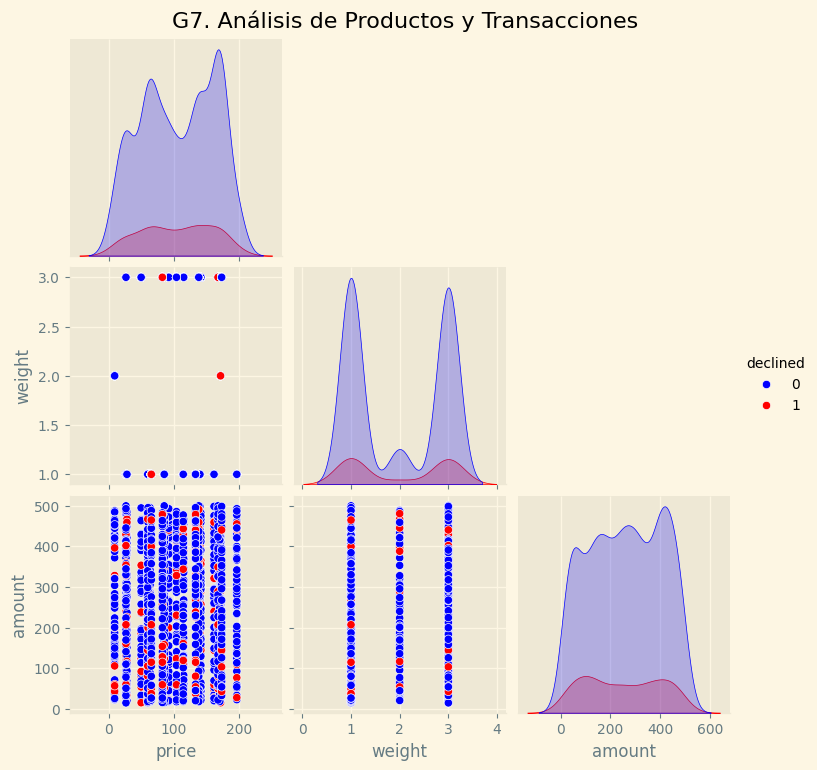

In [ ]:
productos_transacciones = producttransaction_df.merge(product_df, left_on="product_id", right_on="id"
                                                      ).merge(transactions_df, left_on="transaction_id", right_on="id")

g7_columnas = ["price", "weight", "amount", "declined"]  # Los campos deben existir en los dataframes
g7_datos = productos_transacciones[g7_columnas]

sns.pairplot(g7_datos, diag_kind="kde", corner=True, hue="declined", palette={0: "blue", 1: "red"})
plt.suptitle("G7. Análisis de Productos y Transacciones", fontsize=16, y=1.02)  # Ajusta y para mover el título

plt.show()